# Notebook d'Exploration
Notebook d'exploration pour nous aider à comprendre les données à notre disposition pour la réalisation de la mission. 
## Sommaire  <a name=0 ></a>
- [A - Fichier "customers" (olist_customers_dataset.csv)](#A)
- [B - Fichier geoloc (olist_geolocation_dataset.csv)](#B)
- [C - Fichier order_items (olist_order_items_dataset.csv)](#C)
- [D - Fichier order_payments (olist_order_payments_dataset.csv)](#D)
- [E - Fichier order_reviews (olist_order_reviews_dataset.csv)](#E)
- [F - Fichier orders (olist_orders_dataset.csv)](#F)
- [G - Fichier products (olist_products_dataset.csv)](#G)
- [H - Fichier sellers (olist_sellers_dataset.csv)](#H)
- [I - Fichier cat_name (product_category_name_translation.csv)](#I)

## Importation des bibliothèques 

In [1]:
%matplotlib inline  
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msno
import numpy as np
import seaborn as sns
import datetime
from IPython.display import Image

## Définition de fonctions personnalisées 

In [2]:
def recap(df):
    """
    - Paramètre : Dataframe 
    - Retourne : Dataframe concatenant 'describe' et 'dtypes' pour chaques colonnes du dataframe en entrée 
    """
    return pd.concat([df.describe(include='all'), df.dtypes.to_frame(name='type').T])

def moda(df,col):
    """
    - Paramètres : 
        - Dataframe
        - Colonne du Dataframe
    - Retourne : Dataframe des modalités de la colonne et du dataframe en entrée avec leur fréquences et leurs effectifs respectifs
    """
    #on comptes le nombre de valeurs dans la colonne
    eff = df[col].value_counts() 
    #on récupères les modalités que prends la variable
    moda = eff.index 
    
    #on crée un DataFrame avec toutes les modalités de la variable
    tab_moda = pd.DataFrame(moda, columns = [col])
    #On ajoute une colonne au DataFrame contenant le nombre d'occurence de la modalité
    tab_moda["n"] = eff.values
    #on ajoute une colonne au DataFrame colculant la fréquence d'apparition de la modalité
    tab_moda["f"] = tab_moda["n"]/sum(tab_moda["n"])*100 
    return tab_moda

def nb_na_col(df, col):
    """
    - Paramètres : 
        - Dataframe
        - Colonne du Dataframe
    - Retourne : Le nombre de 'Na' de la colonne, passée en entrée, du dataframe passé en entrée
    """
    size=df[df[col].isna()==True].shape
    return size[0], size[0]/len(df)*100

def pieplot(df,col):
    """
    - Paramètres : 
        - Dataframe
        - Colonne du Dataframe
    - Retourne : Pieplot de la colonne du dataframe passés en entrée
    """
    return plt.pie(df["n"], labels=df[col], explode=[0.1]*len(df), normalize = True, autopct="%.1f%%")

def diagbar(df,col):
    """
    - Paramètres : 
        - Dataframe
        - Colonne du Dataframe
    - Retourne : Diagramme en barre de la colonne du dataframe passés en entrée
    """
    plt.figure(figsize=(10,5))
    bp=sns.barplot(x=df[col],y=df['f'],palette='Spectral')
    bp.set_xticklabels(labels=df[col],rotation=90)
    plt.show()

## Chargement des fichiers à notre disposition

In [70]:
customers = pd.read_csv("Data/olist_customers_dataset.csv", dtype={'customer_zip_code_prefix':str})
geoloc = pd.read_csv("Data/olist_geolocation_dataset.csv", dtype={'geolocation_zip_code_prefix':str})
order_items = pd.read_csv("Data/olist_order_items_dataset.csv", dtype={'order_item_id':str})
order_payments = pd.read_csv("Data/olist_order_payments_dataset.csv", dtype={'payment_sequential':str,'payment_installments':str})
order_reviews = pd.read_csv("Data/olist_order_reviews_dataset.csv")
orders = pd.read_csv("Data/olist_orders_dataset.csv")
products = pd.read_csv("Data/olist_products_dataset.csv")
sellers = pd.read_csv("Data/olist_sellers_dataset.csv", dtype={'seller_zip_code_prefix':str})
cat_name = pd.read_csv("Data/product_category_name_translation.csv")

## Diagramme des relations entre les fichiers
Ce diagramme, fourni par le client, nous permet de visualiser facilement les relations entre les fichiers à notre disposition. Il nous servira, par la suite, pour réaliser des jointures entre fichiers. 

![title](recap.png)

## Exploration des différents fichiers 
### A - Fichier "customers" (olist_customers_dataset.csv) <a name=A ></a> 
[Retour au Sommaire](#0)

In [4]:
customers

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,09790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,01151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,08775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP
...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,03937,sao paulo,SP
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,06764,taboao da serra,SP
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS


In [5]:
recap(customers)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441,99441,99441
unique,99441,96096,14994,4119,27
top,f8cb25e9d5e7200ee03dc9f1f51f197c,8d50f5eadf50201ccdcedfb9e2ac8455,22790,sao paulo,SP
freq,1,17,142,15540,41746
type,object,object,object,object,object


Le fichier contient :
- customer_id : clé avec le dataset 'orders', chaque commande (order) à un unique **customer_id**
- customer_unique_id : identifiant unique pour un client, un **customer_unique_id** peut avoir plusieurs **customer_id**
- customer_zip_code_prefix : cinq premiers chiffres de code postal du client [code postaux au brésil](https://en.wikipedia.org/wiki/List_of_postal_codes_in_Brazil)
- customer_city : nom de la ville du client
- customer_state : état dans lequel vit le client

Ce dataset contient des informations à propos des clients et de leur localisation. Il est utilisé pour identifier les "clients uniques" dans le dataset des commandes, "orders", et pour trouver leur adresse de livraison. 

Suivant leur systeme, à chaque commande est assignée un unique "customer_id". Ce qui signifie que le même client aura différents ids pour des commandes différentes. (une commande = un customer_id)

Le principe d'avoir un "customer_unique_id" dans le dataset est de pouvoir identifier les clients qui ont effectués plusieurs commandes dans la boutique. 

#### customer_unique_id : 

In [6]:
moda(customers,'customer_unique_id')

,customer_unique_id,n,f
0,8d50f5eadf50201ccdcedfb9e2ac8455,17,0.017096
1,3e43e6105506432c953e165fb2acf44c,9,0.009051
2,ca77025e7201e3b30c44b472ff346268,7,0.007039
3,6469f99c1f9dfae7733b25662e7f1782,7,0.007039
4,1b6c7548a2a1f9037c1fd3ddfed95f33,7,0.007039
...,...,...,...
96091,68652e69a77dec3f573ef0135541f6b5,1,0.001006
96092,fef1b9aff93f898e82d0529baf18eb81,1,0.001006
96093,4db680286d0e7630aef788793004a817,1,0.001006
96094,556a795f0c4fc9414ad99778902016ea,1,0.001006


On observe 96 096 clients uniques en tout.

In [7]:
moda(customers,'customer_unique_id')[moda(customers,'customer_unique_id')['n']>1]

,customer_unique_id,n,f
0,8d50f5eadf50201ccdcedfb9e2ac8455,17,0.017096
1,3e43e6105506432c953e165fb2acf44c,9,0.009051
2,ca77025e7201e3b30c44b472ff346268,7,0.007039
3,6469f99c1f9dfae7733b25662e7f1782,7,0.007039
4,1b6c7548a2a1f9037c1fd3ddfed95f33,7,0.007039
...,...,...,...
2992,fcceb56470bf0b4d59caa87e111ca69e,2,0.002011
2993,9d8130e675ce6c1f24cd519444f7642b,2,0.002011
2994,d3581765bcf955dcf282b1642c74157c,2,0.002011
2995,7599dea7f7520c8c37351721ad6870de,2,0.002011


On remarque que seulement 2 997 clients ont effectués au moins 2 commandes, soit un peut plus de 3%. 
#### customer_zip_code_prefix
Les cinq premiers chiffres de code postal du client.

In [8]:
moda(customers,'customer_zip_code_prefix')

,customer_zip_code_prefix,n,f
0,22790,142,0.142798
1,24220,124,0.124697
2,22793,121,0.121680
3,24230,117,0.117658
4,22775,110,0.110618
...,...,...,...
14989,01550,1,0.001006
14990,15425,1,0.001006
14991,51290,1,0.001006
14992,61801,1,0.001006


#### customer_city
Nom de la ville du client

In [9]:
moda(customers,'customer_city')

,customer_city,n,f
0,sao paulo,15540,15.627357
1,rio de janeiro,6882,6.920687
2,belo horizonte,2773,2.788588
3,brasilia,2131,2.142979
4,curitiba,1521,1.529550
...,...,...,...
4114,ubirajara,1,0.001006
4115,agrolandia,1,0.001006
4116,quipapa,1,0.001006
4117,progresso,1,0.001006


Les 10 villes les plus représentées :

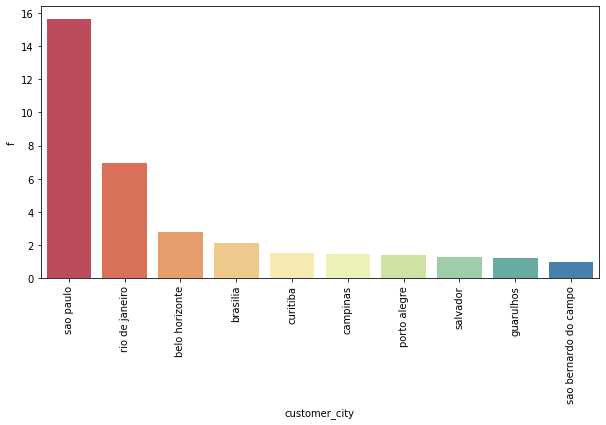

In [10]:
diagbar(moda(customers,'customer_city').head(10),'customer_city')

Avec plus de 15% des individus, Sao Paulo est la ville qui contient le plus de clients, suivie de Rio et Belo Horizonte avec respectivement 6,9% et 2,7%. Brasilia, la capitale, est en 4ème position avec 2,1% des clients. 
#### customer_state
État dans lequel vit le client.

In [11]:
moda(customers,'customer_state')

,customer_state,n,f
0,SP,41746,41.980672
1,RJ,12852,12.924247
2,MG,11635,11.700405
3,RS,5466,5.496727
4,PR,5045,5.073360
5,SC,3637,3.657445
6,BA,3380,3.399000
7,DF,2140,2.152030
8,ES,2033,2.044428
9,GO,2020,2.031355


On remarque que les clients viennent des 27 états qui composent le Brésil. 

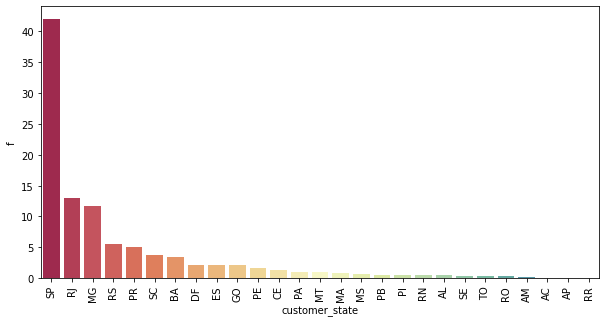

In [12]:
diagbar(moda(customers,'customer_state'),'customer_state')

L'état de Sao Paulo arrive largement en tête avec plus de 41,9% des clients qui proviennent de cet état. Il est suvit des états de Rio de Janeiro et de Minas Gerais avec 12,9% et 11,7%. 

In [13]:
customers.to_csv(r'C:\Users\Raphaël\Documents\1_Formation_OC\P5\Data\Clean\customers.csv', index = False)

## B - Fichier geoloc (olist_geolocation_dataset.csv) <a name=B ></a> 
[Retour au Sommaire](#0)

Ce fichier contient des informations complémentaires sur la géolocalisation. En plus du **zip_code_prefix**,**city** et **state** il y a les informations de **lattitude** et **longitude**. 
Ces informations peuvent nous permettre de créer des cartes, calculer des distances,etc...

In [14]:
geoloc

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,01037,-23.545621,-46.639292,sao paulo,SP
1,01046,-23.546081,-46.644820,sao paulo,SP
2,01046,-23.546129,-46.642951,sao paulo,SP
3,01041,-23.544392,-46.639499,sao paulo,SP
4,01035,-23.541578,-46.641607,sao paulo,SP
...,...,...,...,...,...
1000158,99950,-28.068639,-52.010705,tapejara,RS
1000159,99900,-27.877125,-52.224882,getulio vargas,RS
1000160,99950,-28.071855,-52.014716,tapejara,RS
1000161,99980,-28.388932,-51.846871,david canabarro,RS


In [15]:
recap(geoloc)

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
count,1000163,1.00016e+06,1.00016e+06,1000163,1000163
unique,19015,NaN,NaN,8011,27
top,24220,NaN,NaN,sao paulo,SP
freq,1146,NaN,NaN,135800,404268
mean,NaN,-21.1762,-46.3905,NaN,NaN
std,NaN,5.71587,4.26975,NaN,NaN
min,NaN,-36.6054,-101.467,NaN,NaN
25%,NaN,-23.6035,-48.5732,NaN,NaN
50%,NaN,-22.9194,-46.6379,NaN,NaN
75%,NaN,-19.9796,-43.7677,NaN,NaN


Cartographie :

<AxesSubplot:xlabel='geolocation_lng', ylabel='geolocation_lat'>

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


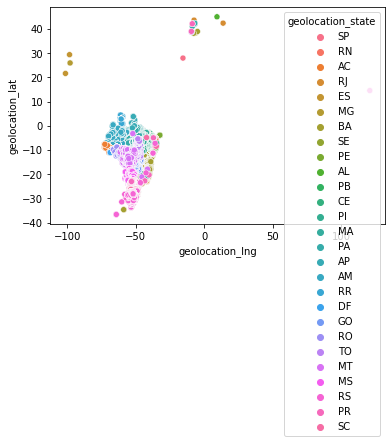

In [16]:
sns.scatterplot(data=geoloc,x='geolocation_lng',y='geolocation_lat', hue='geolocation_state')

point le plus au Nord du Brésil : 5.27509429090449, -60.237867829213
point le plus au Sud : -33.73537830651121, -53.41165202523261
point le plus à l'Est : -7.447651560889477, -34.91565457623959
point le plus à l'Ouest : -7.49946764818512, -73.84941297565302

In [17]:
geoloc[(geoloc['geolocation_lat']>5.27)|(geoloc['geolocation_lat']<-33.73)|(geoloc['geolocation_lng']>-34.91)|(geoloc['geolocation_lng']<-73.85)]

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
387565,18243,28.008978,-15.536867,bom retiro da esperanca,SP
502492,27165,-8.068203,-34.893333,sao jose do turvo,RJ
513631,28165,41.614052,-8.411675,vila nova de campos,RJ
513634,28140,-8.048916,-34.880387,santo amaro de campos,RJ
513643,28155,-34.586422,-58.732101,santa maria,RJ
...,...,...,...,...,...
865611,83810,39.057629,-9.400037,areia branca dos assis,PR
965687,95130,14.585073,121.105394,santa lucia do piai,RS
992584,98780,-36.605374,-64.283946,santa rosa,RS
993075,98780,-36.603837,-64.287433,santa rosa,RS


<AxesSubplot:xlabel='geolocation_lng', ylabel='geolocation_lat'>

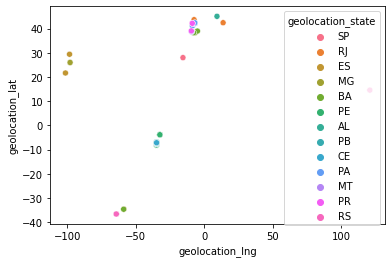

In [18]:
sns.scatterplot(data=geoloc[(geoloc['geolocation_lat']>5.27)|(geoloc['geolocation_lat']<-33.73)|(geoloc['geolocation_lng']>-34.91)|(geoloc['geolocation_lng']<-73.85)],x='geolocation_lng',y='geolocation_lat', hue='geolocation_state')

In [19]:
geoloc.to_csv(r'C:\Users\Raphaël\Documents\1_Formation_OC\P5\Data\Clean\geoloc.csv', index = False)

## C - Fichier order_items (olist_order_items_dataset.csv)<a name=C ></a> 
[Retour au Sommaire](#0)

Ce dataset contient les données des produits de chaques commandes

In [20]:
order_items

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14
...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72


In [21]:
recap(order_items)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
count,112650,112650,112650,112650,112650,112650,112650
unique,98666,21,32951,3095,93318,NaN,NaN
top,8272b63d03f5f79c56e9e4120aec44ef,1,aca2eb7d00ea1a7b8ebd4e68314663af,6560211a19b47992c3666cc44a7e94c0,2017-07-21 18:25:23,NaN,NaN
freq,21,98666,527,2033,21,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,120.654,19.9903
std,NaN,NaN,NaN,NaN,NaN,183.634,15.8064
min,NaN,NaN,NaN,NaN,NaN,0.85,0
25%,NaN,NaN,NaN,NaN,NaN,39.9,13.08
50%,NaN,NaN,NaN,NaN,NaN,74.99,16.26
75%,NaN,NaN,NaN,NaN,NaN,134.9,21.15


#### order_id 
Identifiant de la commande 

In [22]:
moda(order_items,'order_id')

,order_id,n,f
0,8272b63d03f5f79c56e9e4120aec44ef,21,0.018642
1,ab14fdcfbe524636d65ee38360e22ce8,20,0.017754
2,1b15974a0141d54e36626dca3fdc731a,20,0.017754
3,428a2f660dc84138d969ccd69a0ab6d5,15,0.013316
4,9ef13efd6949e4573a18964dd1bbe7f5,15,0.013316
...,...,...,...
98661,cb44ede59056dd2add95fb810b393786,1,0.000888
98662,cee9f1845c95efd83885a0b2f7a22b83,1,0.000888
98663,d27a4fbd0d3a4cfdf8a109dd88743502,1,0.000888
98664,39263e1d21c19dd12321cbdb04b3175c,1,0.000888


On observe qu'un **order_id** peut être présent plusieurs fois dans le dataset. 
#### order_item_id 
C'est un numéro d'identifiant pour connaitre le nombre de produits identiques dans une commande. Par exemple si un client commande 2 produits identique dans une même commande l'order_item_id, le premier produit aura un **order_item_id**=1 et le second = 2.

In [23]:
moda(order_items,'order_item_id')

,order_item_id,n,f
0,1,98666,87.586329
1,2,9803,8.702175
2,3,2287,2.030182
3,4,965,0.856636
4,5,460,0.408344
5,6,256,0.227253
6,7,58,0.051487
7,8,36,0.031957
8,9,28,0.024856
9,10,25,0.022193


#### product_id 
Identifiant du produit

In [24]:
moda(order_items,'product_id')

,product_id,n,f
0,aca2eb7d00ea1a7b8ebd4e68314663af,527,0.467821
1,99a4788cb24856965c36a24e339b6058,488,0.433200
2,422879e10f46682990de24d770e7f83d,484,0.429649
3,389d119b48cf3043d311335e499d9c6b,392,0.347980
4,368c6c730842d78016ad823897a372db,388,0.344430
...,...,...,...
32946,20dfc860c4bf533f00053ad778d01a66,1,0.000888
32947,22dfa7d077d1088aba3095c67ee10a9a,1,0.000888
32948,c2fffbd2b50c3f612755de49109e6d97,1,0.000888
32949,ef0045bdfc1b559c7695588c4bc324a3,1,0.000888


Le fichier contient donc 32 951 produits différents. 
#### seller_id 
Identifiant du vendeur

In [25]:
moda(order_items,'seller_id')

,seller_id,n,f
0,6560211a19b47992c3666cc44a7e94c0,2033,1.804705
1,4a3ca9315b744ce9f8e9374361493884,1987,1.763870
2,1f50f920176fa81dab994f9023523100,1931,1.714159
3,cc419e0650a3c5ba77189a1882b7556a,1775,1.575677
4,da8622b14eb17ae2831f4ac5b9dab84a,1551,1.376831
...,...,...,...
3090,c18309219e789960add0b2255ca4b091,1,0.000888
3091,7ab0dd5487bab2dc835337b244f689fb,1,0.000888
3092,417a1e6c7321084d2a0ae0d023cfad93,1,0.000888
3093,204b4e07bddef3c9b317f70189135b22,1,0.000888


On observe donc 3 095 vendeurs différents. 
#### shipping_limit_date 
Date limite d'expédition = date limite à laquelle le vendeur doit avoir transmis la commande au partenaire logistique. <br><br>
Conversion de la colonne en type datetime :

In [26]:
order_items['shipping_limit_date']=pd.to_datetime(order_items['shipping_limit_date'])

#### price 
Prix de l'article

In [27]:
order_items['price'].describe()

count    112650.000000
mean        120.653739
std         183.633928
min           0.850000
25%          39.900000
50%          74.990000
75%         134.900000
max        6735.000000
Name: price, dtype: float64

Les prix vont de 0.85 à 6 735, l'unité monétaire n'ayant pas été précisié. 

Text(0.5, 1.0, 'price')

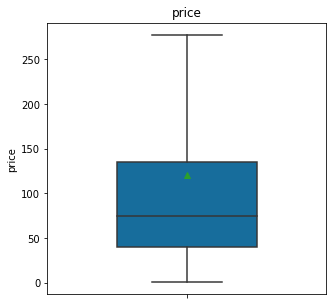

In [28]:
plt.figure(figsize=(5,5))
plot=sns.boxplot(y='price', data=order_items, width=0.5, palette="colorblind", showfliers=False, showmeans=True)
plot.set_title("price")

Le prix moyen des produits est de 120,65 et le prix médian de 74,99. Le montant moyen est tiré vers le haut par la présence de peut de produit ayant un montant élevé, en effet seulement 25% des produits ont un montant supérieur à 134,9. 

<AxesSubplot:xlabel='price', ylabel='Count'>

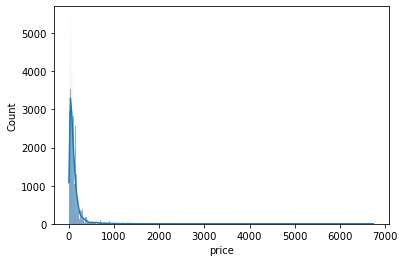

In [29]:
sns.histplot(data=order_items['price'], kde=True)

Le graphique ci-dessus nous permet d'observer la distribution des prix des produits. On remarque bien un étalement vers des valeurs hautes. Observons la distribution des prix entre 0 et 1000 :

<AxesSubplot:xlabel='price', ylabel='Count'>

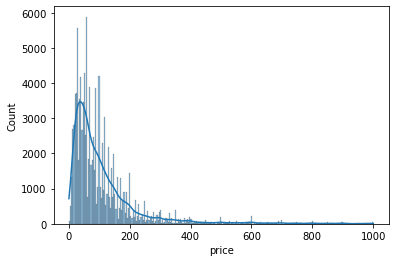

In [30]:
sns.histplot(data=order_items['price'][order_items['price']<1000], kde=True)

### freight_value 
Frais de port pour le produit, si la commande à plus d'un produit alors la valeur des frais de port est divisée entre chaque produits.

In [31]:
order_items['freight_value'].describe()

count    112650.000000
mean         19.990320
std          15.806405
min           0.000000
25%          13.080000
50%          16.260000
75%          21.150000
max         409.680000
Name: freight_value, dtype: float64

Les frais de ports par produits vont de 0 à 409,68. En moyenne les frais de ports par produits s'élèvent à 19,99, cette moyenne est tirée vers le haut par quelques produits ayant des frais de ports très élevés, en effet 25% des produits ont des frais de ports supérieurs à 21,15. 

Text(0.5, 1.0, 'freight_value')

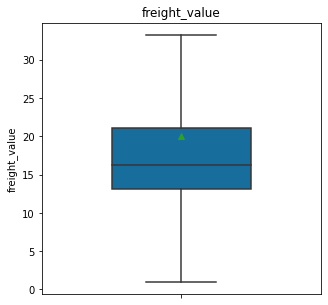

In [32]:
plt.figure(figsize=(5,5))
plot=sns.boxplot(y='freight_value', data=order_items, width=0.5, palette="colorblind", showfliers=False, showmeans=True)
plot.set_title("freight_value")

<AxesSubplot:xlabel='freight_value', ylabel='Count'>

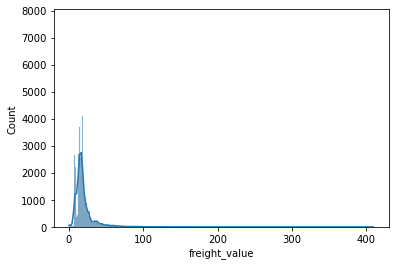

In [33]:
sns.histplot(data=order_items['freight_value'], kde=True)

Sur le graphique ci-dessus on voit bien l'étalement des montants des frais de ports vers de hautes valeurs ainsi que la concentration élevée des produits dont les frais de ports sont entre 0 et +/-40. Regardons de plus près cette zone de concentration :

<AxesSubplot:xlabel='freight_value', ylabel='Count'>

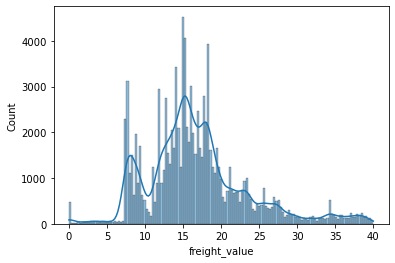

In [34]:
sns.histplot(data=order_items['freight_value'][order_items['freight_value']<40], kde=True)

On observe une distribution avec plusieurs pics:
    - 0 : +/- 500
    - aux alentours 7 : +/- 3 000
    - aux alentours de 15 : +/- 4 500
    - aux alentours de 17 : +/- 4 000

In [35]:
order_items.to_csv(r'C:\Users\Raphaël\Documents\1_Formation_OC\P5\Data\Clean\order_items.csv', index = False)

## D - Fichier order_payments (olist_order_payments_dataset.csv) <a name=D ></a> 
[Retour au Sommaire](#0)

Ce fichier contient des informations sur les options de paiement des commandes.

In [36]:
order_payments

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45
...,...,...,...,...,...
103881,0406037ad97740d563a178ecc7a2075c,1,boleto,1,363.31
103882,7b905861d7c825891d6347454ea7863f,1,credit_card,2,96.80
103883,32609bbb3dd69b3c066a6860554a77bf,1,credit_card,1,47.77
103884,b8b61059626efa996a60be9bb9320e10,1,credit_card,5,369.54


In [37]:
recap(order_payments)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
count,103886,103886,103886,103886,103886
unique,99440,29,5,24,NaN
top,fa65dad1b0e818e3ccc5cb0e39231352,1,credit_card,1,NaN
freq,29,99360,76795,52546,NaN
mean,NaN,NaN,NaN,NaN,154.1
std,NaN,NaN,NaN,NaN,217.494
min,NaN,NaN,NaN,NaN,0
25%,NaN,NaN,NaN,NaN,56.79
50%,NaN,NaN,NaN,NaN,100
75%,NaN,NaN,NaN,NaN,171.838


#### order_id 
Identifiant de la commande

In [38]:
moda(order_payments,'order_id')

,order_id,n,f
0,fa65dad1b0e818e3ccc5cb0e39231352,29,0.027915
1,ccf804e764ed5650cd8759557269dc13,26,0.025027
2,285c2e15bebd4ac83635ccc563dc71f4,22,0.021177
3,895ab968e7bb0d5659d16cd74cd1650c,21,0.020214
4,fedcd9f7ccdc8cba3a18defedd1a5547,19,0.018289
...,...,...,...
99435,077743f9ba8964fff85ace5b958e5284,1,0.000963
99436,a062c240bb299fa3f0ce55cf05ec8390,1,0.000963
99437,1dbd4cdee432aa3ffded4c64c7b9d846,1,0.000963
99438,7dd6305a1d458ac09cd7581092afd396,1,0.000963


#### payment_sequential 
Un client peux payer une commande avec plusieurs modes de paiements, dès qu'il rajoute un mode de paiement le payment_sequential est incrémenté.

In [39]:
moda(order_payments,'payment_sequential')

,payment_sequential,n,f
0,1,99360,95.643301
1,2,3039,2.925322
2,3,581,0.559267
3,4,278,0.267601
4,5,170,0.163641
5,6,118,0.113586
6,7,82,0.078933
7,8,54,0.051980
8,9,43,0.041392
9,10,34,0.032728


In [40]:
order_payments[order_payments['payment_sequential']=='29']

,order_id,payment_sequential,payment_type,payment_installments,payment_value
39108,fa65dad1b0e818e3ccc5cb0e39231352,29,voucher,1,19.26


In [41]:
order_payments[order_payments['order_id']=='fa65dad1b0e818e3ccc5cb0e39231352']

,order_id,payment_sequential,payment_type,payment_installments,payment_value
4885,fa65dad1b0e818e3ccc5cb0e39231352,27,voucher,1,66.02
9985,fa65dad1b0e818e3ccc5cb0e39231352,4,voucher,1,29.16
14321,fa65dad1b0e818e3ccc5cb0e39231352,1,voucher,1,3.71
17274,fa65dad1b0e818e3ccc5cb0e39231352,9,voucher,1,1.08
19565,fa65dad1b0e818e3ccc5cb0e39231352,10,voucher,1,12.86
23074,fa65dad1b0e818e3ccc5cb0e39231352,2,voucher,1,8.51
24879,fa65dad1b0e818e3ccc5cb0e39231352,25,voucher,1,3.68
28330,fa65dad1b0e818e3ccc5cb0e39231352,5,voucher,1,0.66
29648,fa65dad1b0e818e3ccc5cb0e39231352,6,voucher,1,5.02
32519,fa65dad1b0e818e3ccc5cb0e39231352,11,voucher,1,4.03


On remarque ici qu'on a des payment_sequential qui vont jusqu'à 29, soit 29 méthodes de paiments différentes, pour une même commande. On remarque en prenant l'id à 29 types de paiement, que les bons d'achats sont utilisés et que chaque bon d'achat est pris individuellement comme un moyen de paiment différent.

#### payment_type
Méthode de paiement utilisée

In [42]:
moda(order_payments,'payment_type')

,payment_type,n,f
0,credit_card,76795,73.922376
1,boleto,19784,19.043952
2,voucher,5775,5.558978
3,debit_card,1529,1.471806
4,not_defined,3,0.002888


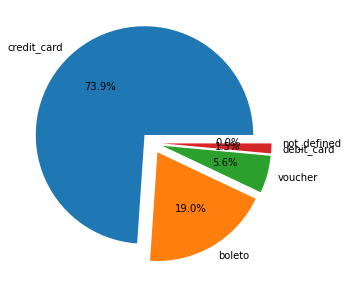

In [43]:
plt.figure(figsize=(10,5))
fig=pieplot(moda(order_payments,'payment_type'),'payment_type')

cinq types de moyens de paiements sont présents :
- carte de crédit
- billets
- bon d'achat
- carte de débit
- non-définie

La carte de crédit est le moyen de paiement le plus utilisé avec 73,9% des paiements. 

#### payment_installments
Nombre de versements choisis

In [44]:
moda(order_payments,'payment_installments')

,payment_installments,n,f
0,1,52546,50.580444
1,2,12413,11.948675
2,3,10461,10.069692
3,4,7098,6.832489
4,10,5328,5.128699
5,5,5239,5.043028
6,8,4268,4.108350
7,6,3920,3.773367
8,7,1626,1.565177
9,9,644,0.619910


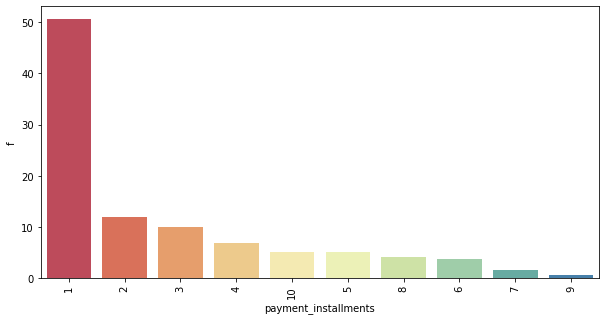

In [45]:
diagbar(moda(order_payments,'payment_installments').head(10),'payment_installments')

Les paiements en 1 fois sont majoritaires, plus de la moitié des paiement sont effectués en une seule fois. Au total, plus de 72% des paiement sont effectués en 3 fois au maximum. On remarque quand même que les paiements en 10 fois sont en 5ème position avec un peut plus de 5% des paiements.

#### payment_value
Montant de la transaction

In [46]:
order_payments['payment_value'].describe()

count    103886.000000
mean        154.100380
std         217.494064
min           0.000000
25%          56.790000
50%         100.000000
75%         171.837500
max       13664.080000
Name: payment_value, dtype: float64

In [47]:
order_payments[order_payments['payment_value']==0]

,order_id,payment_sequential,payment_type,payment_installments,payment_value
19922,8bcbe01d44d147f901cd3192671144db,4,voucher,1,0.0
36822,fa65dad1b0e818e3ccc5cb0e39231352,14,voucher,1,0.0
43744,6ccb433e00daae1283ccc956189c82ae,4,voucher,1,0.0
51280,4637ca194b6387e2d538dc89b124b0ee,1,not_defined,1,0.0
57411,00b1cb0320190ca0daa2c88b35206009,1,not_defined,1,0.0
62674,45ed6e85398a87c253db47c2d9f48216,3,voucher,1,0.0
77885,fa65dad1b0e818e3ccc5cb0e39231352,13,voucher,1,0.0
94427,c8c528189310eaa44a745b8d9d26908b,1,not_defined,1,0.0
100766,b23878b3e8eb4d25a158f57d96331b18,4,voucher,1,0.0


In [48]:
len(order_payments[order_payments['payment_value']==0])

9

On remarque 9 transactions dont le paiement est nul. 

In [49]:
order_payments[order_payments['payment_value']>0].describe()

,payment_value
count,103877.000000
mean,154.113732
std,217.498755
min,0.010000
25%,56.820000
50%,100.000000
75%,171.840000
max,13664.080000


En moyenne, un paiement s'élève à un peut plus de 154. On remarque la présence de paiement très élevés avec un maximum à 13 664,84. De plus, seulement 25% des paiements sont supérieurs à 171,84. 

Text(0.5, 1.0, 'payment_value')

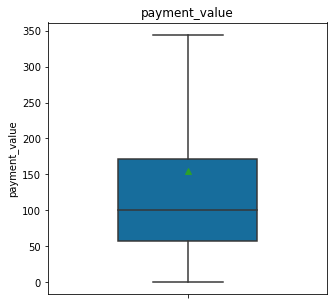

In [50]:
plt.figure(figsize=(5,5))
plot=sns.boxplot(y='payment_value', data=order_payments, width=0.5, palette="colorblind", showfliers=False, showmeans=True)
plot.set_title("payment_value")

<AxesSubplot:xlabel='payment_value', ylabel='Count'>

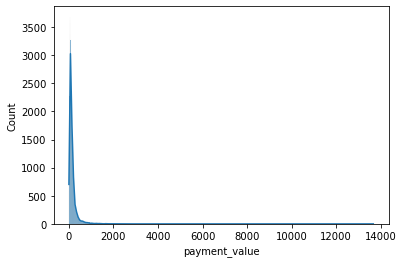

In [51]:
sns.histplot(data=order_payments['payment_value'], kde=True)

On remarque une distribution étalée vers de hautes valeurs. On va s'intérresser au pic dans la distribution :

<AxesSubplot:xlabel='payment_value', ylabel='Count'>

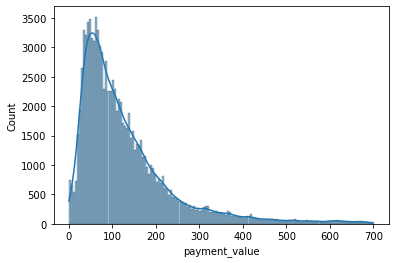

In [52]:
sns.histplot(data=order_payments['payment_value'][order_payments['payment_value']<700], kde=True)

Le pic se situe un peut avant 100 .

In [53]:
order_payments.to_csv(r'C:\Users\Raphaël\Documents\1_Formation_OC\P5\Data\Clean\order_payments.csv', index = False)

## E - Fichier order_reviews (olist_order_reviews_dataset.csv) <a name=E ></a> 
[Retour au Sommaire](#0)

Ce fichier contient des données à propos des avis des clients.

Après un achat sur le Store Olist le vendeur est notifié pour compléter la commande. Une fois que le client à reçu sa commande, ou que la date estimée de livraison est dépassée, le client reçoit une enquête de satisfaction par email ou il peut donner une note sur l'expérience d'achat et laisser un commentaire.

In [54]:
order_reviews

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53
...,...,...,...,...,...,...,...
99995,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09 00:00:00,2017-12-11 20:06:42
99996,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,NaN,"Excelente mochila, entrega super rápida. Super...",2018-03-22 00:00:00,2018-03-23 09:10:43
99997,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,NaN,NaN,2018-07-01 00:00:00,2018-07-02 12:59:13
99998,be360f18f5df1e0541061c87021e6d93,f8bd3f2000c28c5342fedeb5e50f2e75,1,NaN,Solicitei a compra de uma capa de retrovisor c...,2017-12-15 00:00:00,2017-12-16 01:29:43


In [55]:
recap(order_reviews)

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
count,100000,100000,100000,11715,41753,100000,100000
unique,99173,99441,NaN,4600,36921,637,99010
top,abbfacb2964f74f6487c9c10ac46daa6,03c939fd7fd3b38f8485a0f95798f1f6,NaN,Recomendo,Muito bom,2017-12-19 00:00:00,2017-06-15 23:21:05
freq,3,3,NaN,426,230,466,4
mean,NaN,NaN,4.07089,NaN,NaN,NaN,NaN
std,NaN,NaN,1.35966,NaN,NaN,NaN,NaN
min,NaN,NaN,1,NaN,NaN,NaN,NaN
25%,NaN,NaN,4,NaN,NaN,NaN,NaN
50%,NaN,NaN,5,NaN,NaN,NaN,NaN
75%,NaN,NaN,5,NaN,NaN,NaN,NaN


conversion de review_creation_date & review_answer_timestamp en dates

In [56]:
order_reviews['review_creation_date']=pd.to_datetime(order_reviews['review_creation_date'])
order_reviews['review_answer_timestamp']=pd.to_datetime(order_reviews['review_answer_timestamp'])

#### review_id
identifiant unique de l'avis

In [57]:
moda(order_reviews,'review_id')

,review_id,n,f
0,abbfacb2964f74f6487c9c10ac46daa6,3,0.003
1,f4bb9d6dd4fb6dcc2298f0e7b17b8e1e,3,0.003
2,dbdf1ea31790c8ecfcc6750525661a9b,3,0.003
3,32415bbf6e341d5d517080a796f79b5c,3,0.003
4,3415c9f764e478409e8e0660ae816dd2,3,0.003
...,...,...,...
99168,7577a8f992b820934c2170d06b835c34,1,0.001
99169,5cbfe6f618247a8ffa2c3bd21b2e64a8,1,0.001
99170,779cd6582db5e6049d00ec4b5533d4da,1,0.001
99171,de487803a249760171e0b6793e5b33f0,1,0.001


In [58]:
order_reviews[order_reviews['review_id']=='dbdf1ea31790c8ecfcc6750525661a9b']

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
24420,dbdf1ea31790c8ecfcc6750525661a9b,fa06c9f04ef55a2a43f2246a0777b7c8,1,NaN,O produto veio embalado apenas por um frágil e...,2018-03-20,2018-03-21 01:02:05
49929,dbdf1ea31790c8ecfcc6750525661a9b,3cf387bb14e9db171ccbb9b87ea607bb,1,NaN,O produto veio embalado apenas por um frágil e...,2018-03-20,2018-03-21 01:02:05
96293,dbdf1ea31790c8ecfcc6750525661a9b,9406240a4e41945ba492020a2702f757,1,NaN,O produto veio embalado apenas por um frágil e...,2018-03-20,2018-03-21 01:02:05


On s'attendais à avoir 1 avis par commande, hors on remarque qu'on à plusieurs review_id. De plus on observe que ce même review_id fait référence à différents order_id mais avec le même commentaire et la même date. 

### order_id
identifiant unique de la commande

In [59]:
moda(order_reviews,'order_id')

,order_id,n,f
0,03c939fd7fd3b38f8485a0f95798f1f6,3,0.003
1,8e17072ec97ce29f0e1f111e598b0c85,3,0.003
2,c88b1d1b157a9999ce368f218a407141,3,0.003
3,df56136b8031ecd28e200bb18e6ddb2e,3,0.003
4,08bf75dcf867b9f13026785053e87052,2,0.002
...,...,...,...
99436,1f86788aa6bb65cfe93c9bc996c27e91,1,0.001
99437,fc80ec53e727cdf78992749b30d5af3a,1,0.001
99438,1d28088d0d3f5967393dad85006377b2,1,0.001
99439,4fb03ddd24b3d883bf20f5f196c53890,1,0.001


In [60]:
order_reviews[order_reviews['order_id']=='03c939fd7fd3b38f8485a0f95798f1f6']

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
8329,b04ed893318da5b863e878cd3d0511df,03c939fd7fd3b38f8485a0f95798f1f6,3,NaN,Um ponto negativo que achei foi a cobrança de ...,2018-03-20,2018-03-21 02:28:23
51931,f4bb9d6dd4fb6dcc2298f0e7b17b8e1e,03c939fd7fd3b38f8485a0f95798f1f6,4,NaN,NaN,2018-03-29,2018-03-30 00:29:09
70005,405eb2ea45e1dbe2662541ae5b47e2aa,03c939fd7fd3b38f8485a0f95798f1f6,3,NaN,Seria ótimo se tivesem entregue os 3 (três) pe...,2018-03-06,2018-03-06 19:50:32


On observe plusieurs avis pour une même commande avec des score, des commentaires différents et des date différentes. Ce qui semble signifier qu'il est possible de donner différents avis sur une même commande, soit un avis par produit ?

### review_score
Note allant de 1 à 5 donnée par le client sur une enquête de satisfaction.

In [61]:
order_reviews['review_score'].describe()

count    100000.000000
mean          4.070890
std           1.359663
min           1.000000
25%           4.000000
50%           5.000000
75%           5.000000
max           5.000000
Name: review_score, dtype: float64

Text(0.5, 1.0, 'review_score')

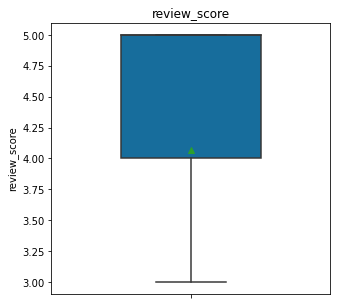

In [62]:
plt.figure(figsize=(5,5))
plot=sns.boxplot(y='review_score', data=order_reviews, width=0.5, palette="colorblind", showfliers=False, showmeans=True)
plot.set_title("review_score")

En moyenne, la note de satisfaction s'élève à un peut plus de 4. Aussi, la distribution est centrée sur des valeurs élevée avec moins de 25% des notes en dessous de 4. 

In [63]:
moda(order_reviews,'review_score')

,review_score,n,f
0,5,57420,57.420
1,4,19200,19.200
2,1,11858,11.858
3,3,8287,8.287
4,2,3235,3.235


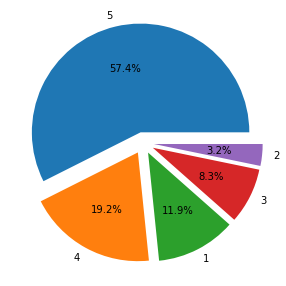

In [64]:
plt.figure(figsize=(10,5))
fig=pieplot(moda(order_reviews,'review_score'),'review_score')

La majorité des avis, plus de 57%, ont une note de 5. La note de 4 arrive en seconde position avec un peut plus de 19% des avis. Aussi on remarque que la note de 1 arrive en 3ème position avec quasiment 12% des avis. 

### review_answer_timestamp
La date à laquelle le questionnaire de satisfaction à été rempli par le client

In [67]:
(order_reviews['review_answer_timestamp'].apply(lambda x: datetime.datetime.strftime(x, "%H:%M"))).sort_values()

78481    00:00
50241    00:00
70387    00:00
23227    00:00
83559    00:00
         ...  
64555    23:59
528      23:59
45059    23:59
40809    23:59
89913    23:59
Name: review_answer_timestamp, Length: 100000, dtype: object

<AxesSubplot:xlabel='review_answer_timestamp', ylabel='Count'>

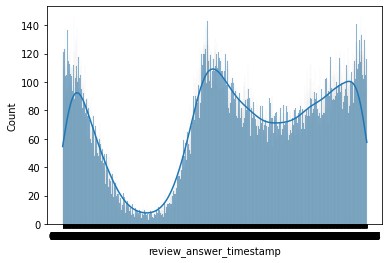

In [68]:
sns.histplot(data=(order_reviews['review_answer_timestamp'].apply(lambda x: datetime.datetime.strftime(x, "%H:%M"))).sort_values(), kde=True)

<AxesSubplot:xlabel='review_answer_timestamp', ylabel='Count'>

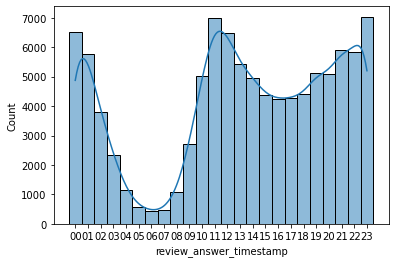

In [69]:
sns.histplot(data=(order_reviews['review_answer_timestamp'].apply(lambda x: datetime.datetime.strftime(x, "%H"))).sort_values(), kde=True)

On remarque que les client ont tendance à remplir le questionnaire de satisfaction :
- Entre 23h & 1h
- Entre 11h & 13h

De plus pendant la nuit très peut de questionnaire sont rempli. Dans l'après-midi il y a moins de réponse que lors des pics, même si le nombre de réponse reste globalement élevé. 

In [75]:
order_reviews.to_csv(r'C:\Users\Raphaël\Documents\1_Formation_OC\P5\Data\Clean\order_reviews.csv', index = False)

## F - Fichier orders (olist_orders_dataset.csv) <a name=F ></a> 
[Retour au Sommaire](#0)

Dataset "principal" qui contient les informations des commandes

In [76]:
orders

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00
...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00


In [77]:
recap(orders)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,c369bdd04f3897a7c27ea9f5aeaeba4b,a260a76f5eb7a337ce2d4709d358784c,delivered,2018-08-02 12:05:26,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-14 20:02:44,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522
type,object,object,object,object,object,object,object,object


conversion des colonnes de date en format date :

In [78]:
orders['order_purchase_timestamp']=pd.to_datetime(orders['order_purchase_timestamp'])
orders['order_approved_at']=pd.to_datetime(orders['order_approved_at'])
orders['order_delivered_carrier_date']=pd.to_datetime(orders['order_delivered_carrier_date'])
orders['order_delivered_customer_date']=pd.to_datetime(orders['order_delivered_customer_date'])
orders['order_estimated_delivery_date']=pd.to_datetime(orders['order_estimated_delivery_date'])

#### order_id 
Identifiant unique d'une commande

#### customer_id 
Identifiant unique résultant d'une combinaise de : order_id & customer_unique_id <br>
Un a donc autant de customer_id qu'il a fait de commandes. 

#### order_status
Statut de la commande

In [79]:
moda(orders,'order_status')

,order_status,n,f
0,delivered,96478,97.020344
1,shipped,1107,1.113223
2,canceled,625,0.628513
3,unavailable,609,0.612423
4,invoiced,314,0.315765
5,processing,301,0.302692
6,created,5,0.005028
7,approved,2,0.002011


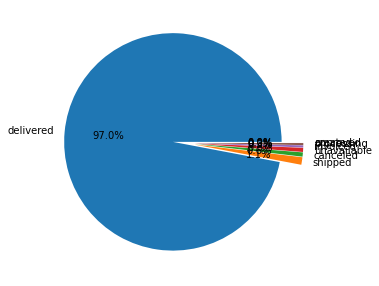

In [80]:
plt.figure(figsize=(10,5))
fig=pieplot(moda(orders,'order_status'),'order_status')

La très grande majorité des commandes, 97%, est livrée.

#### order_purchase_timestamp : 
date de commande
#### order_approved_at : 
date de validation de la commande (date de la validation du paiment)
#### order_delivered_carrier_date : 
date de la prise en compte de la commande par le livreur
#### order_delivered_customer_date :
date de réception de la commande par le client
#### order_estimated_delivery_date : 
date estimée de livraison au client, lors de l'achat

In [81]:
orders.to_csv(r'C:\Users\Raphaël\Documents\1_Formation_OC\P5\Data\Clean\orders.csv', index = False)

## G - Fichier products (olist_products_dataset.csv) <a name=G ></a> 
[Retour au Sommaire](#0)

Informations des produits vendus par Olist

In [82]:
products

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0
...,...,...,...,...,...,...,...,...,...
32946,a0b7d5a992ccda646f2d34e418fff5a0,moveis_decoracao,45.0,67.0,2.0,12300.0,40.0,40.0,40.0
32947,bf4538d88321d0fd4412a93c974510e6,construcao_ferramentas_iluminacao,41.0,971.0,1.0,1700.0,16.0,19.0,16.0
32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,cama_mesa_banho,50.0,799.0,1.0,1400.0,27.0,7.0,27.0
32949,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,60.0,156.0,2.0,700.0,31.0,13.0,20.0


In [83]:
recap(products)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32951,32341,32341,32341,32341,32949,32949,32949,32949
unique,32951,73,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,955821b9200f75f399d091f381821044,cama_mesa_banho,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,3029,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,48.4769,771.495,2.18899,2276.47,30.8151,16.9377,23.1967
std,NaN,NaN,10.2457,635.115,1.73677,4282.04,16.9145,13.6376,12.079
min,NaN,NaN,5,4,1,0,7,2,6
25%,NaN,NaN,42,339,1,300,18,8,15
50%,NaN,NaN,51,595,1,700,25,13,20
75%,NaN,NaN,57,972,3,1900,38,21,30


#### product_id
Identifiant unique des produits

#### product_category_name
Nom de la catégorie des produits

In [84]:
moda(products,'product_category_name')

,product_category_name,n,f
0,cama_mesa_banho,3029,9.365820
1,esporte_lazer,2867,8.864908
2,moveis_decoracao,2657,8.215578
3,beleza_saude,2444,7.556971
4,utilidades_domesticas,2335,7.219938
...,...,...,...
68,casa_conforto_2,5,0.015460
69,fashion_roupa_infanto_juvenil,5,0.015460
70,pc_gamer,3,0.009276
71,seguros_e_servicos,2,0.006184


73 catégories au total.
#### product_name_lenght
Nombre de caractère dans le nom du produit

In [85]:
products['product_name_lenght'].describe()

count    32341.000000
mean        48.476949
std         10.245741
min          5.000000
25%         42.000000
50%         51.000000
75%         57.000000
max         76.000000
Name: product_name_lenght, dtype: float64

Text(0.5, 1.0, 'product_name_lenght')

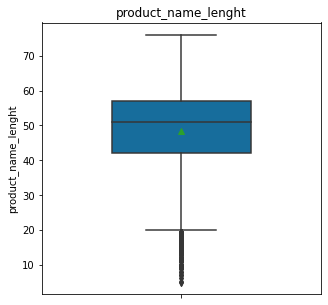

In [86]:
plt.figure(figsize=(5,5))
plot=sns.boxplot(y='product_name_lenght', data=products, width=0.5, palette="colorblind", showfliers=True, showmeans=True)
plot.set_title("product_name_lenght")

<AxesSubplot:xlabel='product_name_lenght', ylabel='Count'>

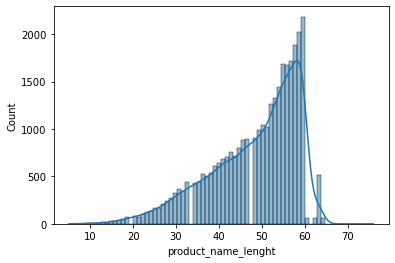

In [87]:
sns.histplot(data=products['product_name_lenght'], kde=True)

#### product_description_lenght
Nombre de caractère dans la description du produit

In [88]:
products['product_description_lenght'].describe()

count    32341.000000
mean       771.495285
std        635.115225
min          4.000000
25%        339.000000
50%        595.000000
75%        972.000000
max       3992.000000
Name: product_description_lenght, dtype: float64

Text(0.5, 1.0, 'product_description_lenght')

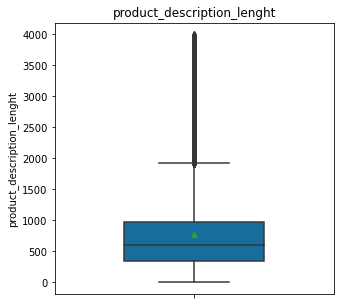

In [89]:
plt.figure(figsize=(5,5))
plot=sns.boxplot(y='product_description_lenght', data=products, width=0.5, palette="colorblind", showfliers=True, showmeans=True)
plot.set_title("product_description_lenght")

<AxesSubplot:xlabel='product_description_lenght', ylabel='Count'>

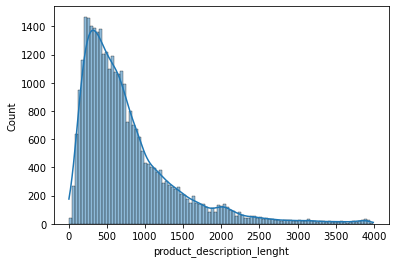

In [90]:
sns.histplot(data=products['product_description_lenght'], kde=True)

#### product_photos_qty
Nombre de photos du produit

In [91]:
products['product_photos_qty'].describe()

count    32341.000000
mean         2.188986
std          1.736766
min          1.000000
25%          1.000000
50%          1.000000
75%          3.000000
max         20.000000
Name: product_photos_qty, dtype: float64

Text(0.5, 1.0, 'product_photos_qty')

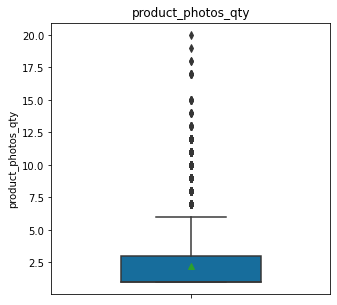

In [92]:
plt.figure(figsize=(5,5))
plot=sns.boxplot(y='product_photos_qty', data=products, width=0.5, palette="colorblind", showfliers=True, showmeans=True)
plot.set_title("product_photos_qty")

#### product_weight_g
Poids du produit en grammes

In [93]:
products['product_weight_g'].describe()

count    32949.000000
mean      2276.472488
std       4282.038731
min          0.000000
25%        300.000000
50%        700.000000
75%       1900.000000
max      40425.000000
Name: product_weight_g, dtype: float64

Text(0.5, 1.0, 'product_weight_g')

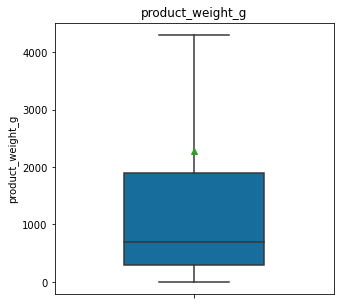

In [94]:
plt.figure(figsize=(5,5))
plot=sns.boxplot(y='product_weight_g', data=products, width=0.5, palette="colorblind", showfliers=False, showmeans=True)
plot.set_title("product_weight_g")

#### product_length_cm
Longueur du produit en centimètres.

In [95]:
products['product_length_cm'].describe()

count    32949.000000
mean        30.815078
std         16.914458
min          7.000000
25%         18.000000
50%         25.000000
75%         38.000000
max        105.000000
Name: product_length_cm, dtype: float64

Text(0.5, 1.0, 'product_length_cm')

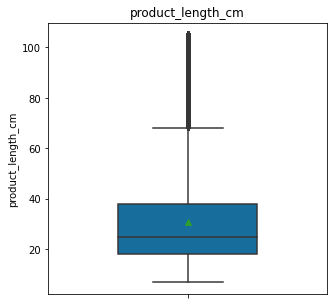

In [96]:
plt.figure(figsize=(5,5))
plot=sns.boxplot(y='product_length_cm', data=products, width=0.5, palette="colorblind", showfliers=True, showmeans=True)
plot.set_title("product_length_cm")

#### product_height_cm
Hauteur du produit en centimètres.

In [97]:
products['product_height_cm'].describe()

count    32949.000000
mean        16.937661
std         13.637554
min          2.000000
25%          8.000000
50%         13.000000
75%         21.000000
max        105.000000
Name: product_height_cm, dtype: float64

Text(0.5, 1.0, 'product_height_cm')

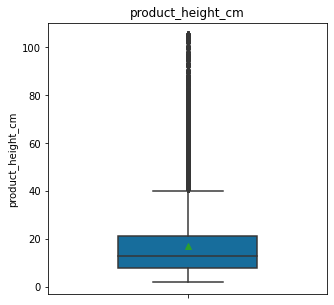

In [98]:
plt.figure(figsize=(5,5))
plot=sns.boxplot(y='product_height_cm', data=products, width=0.5, palette="colorblind", showfliers=True, showmeans=True)
plot.set_title("product_height_cm")

#### product_width_cm
Largeur du produit en centimètres.

In [99]:
products['product_width_cm'].describe()

count    32949.000000
mean        23.196728
std         12.079047
min          6.000000
25%         15.000000
50%         20.000000
75%         30.000000
max        118.000000
Name: product_width_cm, dtype: float64

Text(0.5, 1.0, 'product_width_cm')

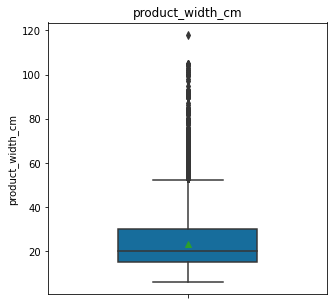

In [100]:
plt.figure(figsize=(5,5))
plot=sns.boxplot(y='product_width_cm', data=products, width=0.5, palette="colorblind", showfliers=True, showmeans=True)
plot.set_title("product_width_cm")

In [107]:
products.to_csv(r'C:\Users\Raphaël\Documents\1_Formation_OC\P5\Data\Clean\products.csv', index = False)

## H - Fichier sellers (olist_sellers_dataset.csv) <a name=H ></a> 
[Retour au Sommaire](#0)

Ce fichier  contient des informations à propos des vendeurs qui ont complétés des commandes sur Olist. 
Dont l'identifiant unique du vendeur, son code postal, sa ville et son état.

In [71]:
sellers

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,04195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP
...,...,...,...,...
3090,98dddbc4601dd4443ca174359b237166,87111,sarandi,PR
3091,f8201cab383e484733266d1906e2fdfa,88137,palhoca,SC
3092,74871d19219c7d518d0090283e03c137,04650,sao paulo,SP
3093,e603cf3fec55f8697c9059638d6c8eb5,96080,pelotas,RS


In [72]:
recap(sellers)

,seller_id,seller_zip_code_prefix,seller_city,seller_state
count,3095,3095,3095,3095
unique,3095,2246,611,23
top,6f229cc508fc6915ed5c499efd93baa4,14940,sao paulo,SP
freq,1,49,694,1849
type,object,object,object,object


In [112]:
sellers.to_csv(r'C:\Users\Raphaël\Documents\1_Formation_OC\P5\Data\Clean\sellers.csv', index = False)

## I - Fichier cat_name (product_category_name_translation.csv) <a name=I ></a> 
[Retour au Sommaire](#0)

Table de transcription des catégories de nom des produits entre le Portugais & l'Anglais. 

In [113]:
cat_name

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor
...,...,...
66,flores,flowers
67,artes_e_artesanato,arts_and_craftmanship
68,fraldas_higiene,diapers_and_hygiene
69,fashion_roupa_infanto_juvenil,fashion_childrens_clothes


In [114]:
recap(cat_name)

,product_category_name,product_category_name_english
count,71,71
unique,71,71
top,cine_foto,small_appliances
freq,1,1
type,object,object


In [115]:
cat_name.to_csv(r'C:\Users\Raphaël\Documents\1_Formation_OC\P5\Data\Clean\cat_name.csv', index = False)